<a href="https://colab.research.google.com/github/vishesh805/Portfolio/blob/main/Machine_Learning(5thsem)Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd
from sklearn import linear_model
!pip install word2number
from word2number import w2n



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
data = pd.read_csv('hiring.csv')

In [6]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
data.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [8]:
avg = data['test_score(out of 10)'].median()
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(avg)
data.isnull().sum()

experience                    2
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [9]:
data.experience = data.experience.fillna('zero')
data.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [10]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [11]:
data.experience = data.experience.apply(w2n.word_to_num)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [12]:
x = data.iloc[:,:3]
x


,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [13]:
y = data.iloc[:,3]
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [14]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [23]:
y_pred = reg.predict(x)
y_pred

array([52350.0727802 , 45734.35225619, 58312.95487627, 63872.63464338,
       67270.74235808, 61148.47161572, 76069.1411936 , 79241.63027656])

In [16]:
table = pd.DataFrame({'Actual value':y,'Predicted':y_pred,'diff':(y-y_pred)})

In [17]:
table

,Actual value,Predicted,diff
0,50000,52350.072780,-2350.072780
1,45000,45734.352256,-734.352256
2,60000,58312.954876,1687.045124
3,65000,63872.634643,1127.365357
4,70000,67270.742358,2729.257642
5,62000,61148.471616,851.528384
6,72000,76069.141194,-4069.141194
7,80000,79241.630277,758.369723


Text(0, 0.5, 'Predicted values')

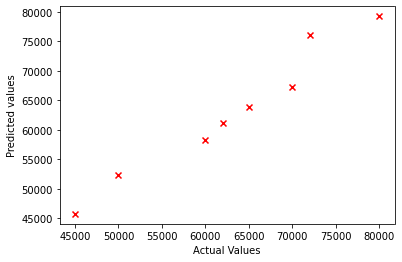

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y,y_pred,marker = 'x',color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [24]:
reg.score(x,y_pred)

1.0